In [1]:
import svjflatanalysis
import numpy as np
from time import strftime
import os
import os.path as osp
import imp, importlib
import mplhep
import seutils

import matplotlib.pyplot as plt
import numpy as np
import coffea

   INFO:2020-11-17 12:52:36:__init__:32 Using tqdm notebook


In [2]:
# qcd = svjflatanalysis.samples.init_bkgs_triggered(category='qcd', max_entries=20, branches='*')
mz150 = svjflatanalysis.samples.init_sig_triggered(year=2018, mz=150, max_entries=20, branches='*')

   INFO:2020-11-17 12:52:38:dataset:208 Cached ~162.3 kb (20 entries, 213 branches) for <svjflatanalysis.dataset.SignalDataset mz150_year2018 (1 root files) object at 0x10bc09310>


In [5]:
# print(qcd[0].name)
print(mz150.name)

mz150_year2018


In [6]:
arrays = mz150.cache[0]
for k in list(sorted(arrays.keys())): print(k)

b'Electrons'
b'Electrons.fCoordinates.fE'
b'Electrons.fCoordinates.fEta'
b'Electrons.fCoordinates.fPhi'
b'Electrons.fCoordinates.fPt'
b'Electrons_charge'
b'Electrons_passIso'
b'EvtNum'
b'GenHT'
b'GenJetsAK8_multiplicity'
b'GenJetsAK8_softDropMass'
b'GenMET'
b'GenMETPhi'
b'GenMHT'
b'GenMHTPhi'
b'GenParticles'
b'GenParticles.fCoordinates.fE'
b'GenParticles.fCoordinates.fEta'
b'GenParticles.fCoordinates.fPhi'
b'GenParticles.fCoordinates.fPt'
b'GenParticles_Charge'
b'GenParticles_ParentId'
b'GenParticles_ParentIdx'
b'GenParticles_PdgId'
b'GenParticles_Status'
b'HT'
b'HT5'
b'JetsAK15'
b'JetsAK15.fCoordinates.fE'
b'JetsAK15.fCoordinates.fEta'
b'JetsAK15.fCoordinates.fPhi'
b'JetsAK15.fCoordinates.fPt'
b'JetsAK15_ID'
b'JetsAK15_MT'
b'JetsAK15_NsubjettinessTau1'
b'JetsAK15_NsubjettinessTau2'
b'JetsAK15_NsubjettinessTau3'
b'JetsAK15_NumBhadrons'
b'JetsAK15_NumChadrons'
b'JetsAK15_RT'
b'JetsAK15_RTnew'
b'JetsAK15_axismajor'
b'JetsAK15_axisminor'
b'JetsAK15_chargedEmEnergyFraction'
b'JetsAK15_char

In [7]:
arrays[b'GenParticles_PdgId'][0]

array([       2,        2,  4900023,  4900101,  4900101, -4900213,
              1,       -1,  4900113,       53,      -53,  4900111,
             51,      -51,  4900213,        4,       -4,  4900021,
       -4900101, -4900101], dtype=int32)

In [33]:
event = {k : v[0] for k, v in arrays.items()}
print(event[b'GenParticles_PdgId'])
print(event[b'GenParticles_Status'][np.abs(event[b'GenParticles_PdgId'])>=4900111])

[       2        2  4900023  4900101  4900101 -4900213        1       -1
  4900113       53      -53  4900111       51      -51  4900213        4
       -4  4900021 -4900101 -4900101]
[83 84 84 84]


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a 

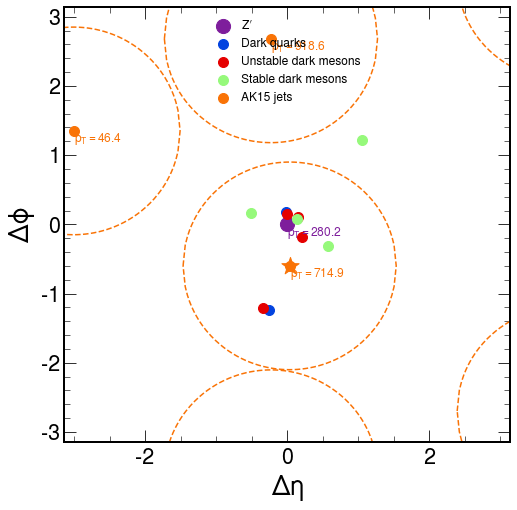

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


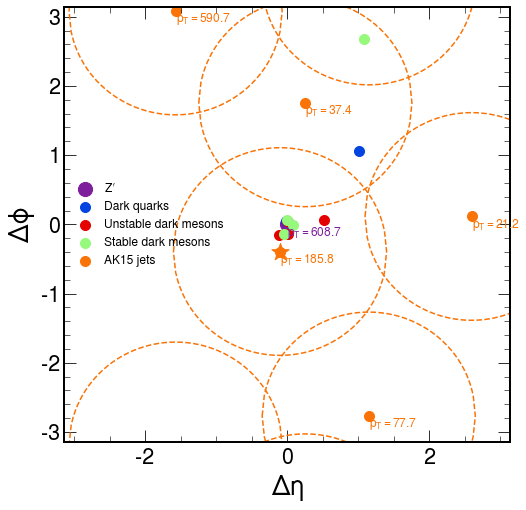

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


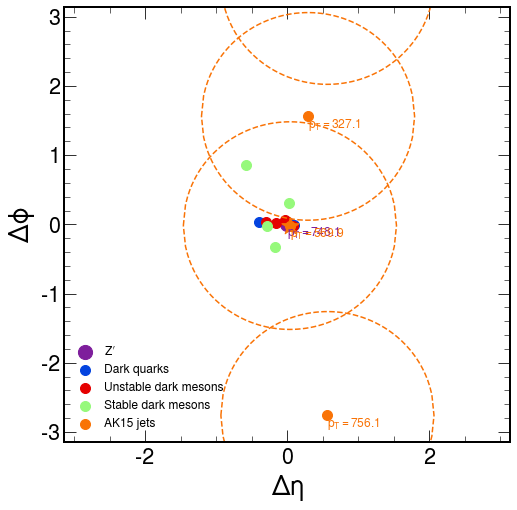

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


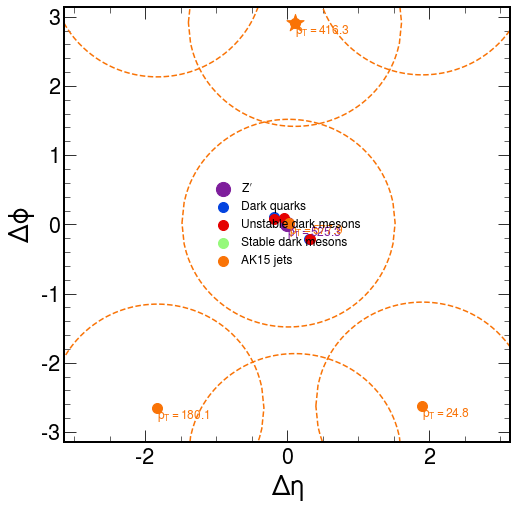

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


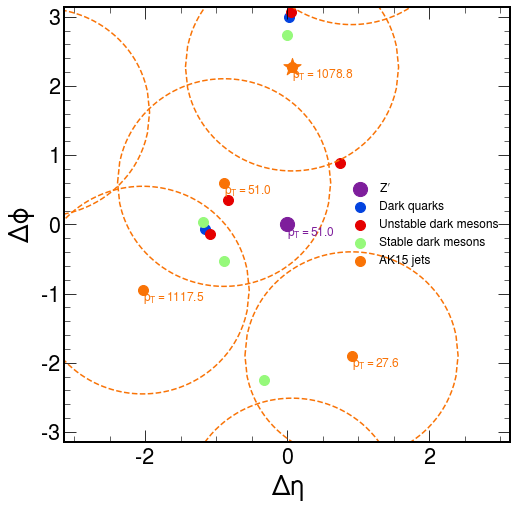

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


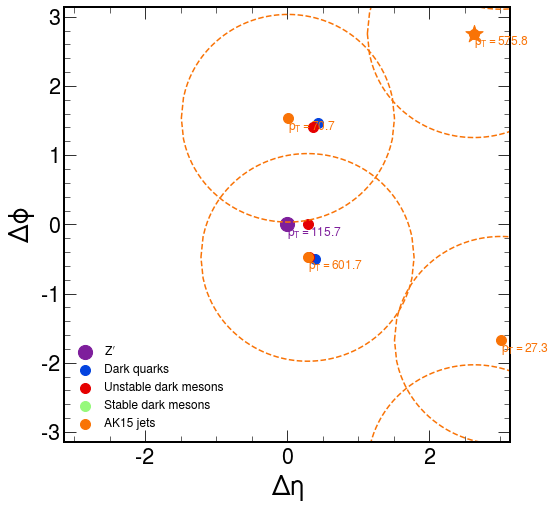

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


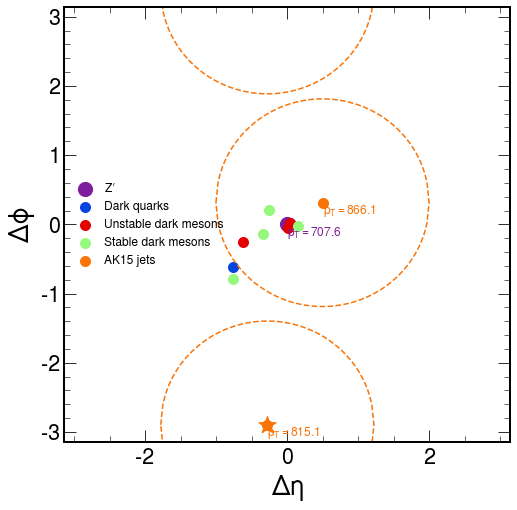

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


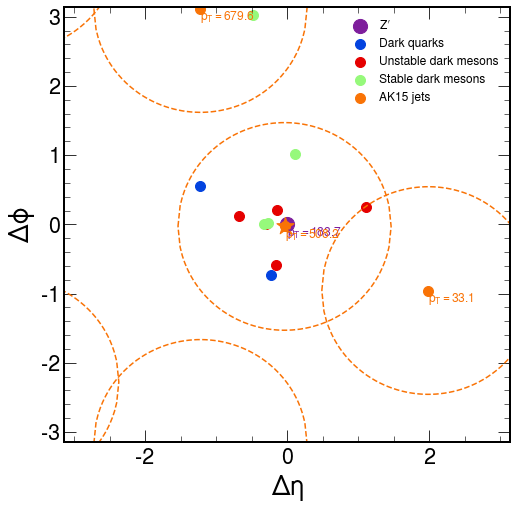

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


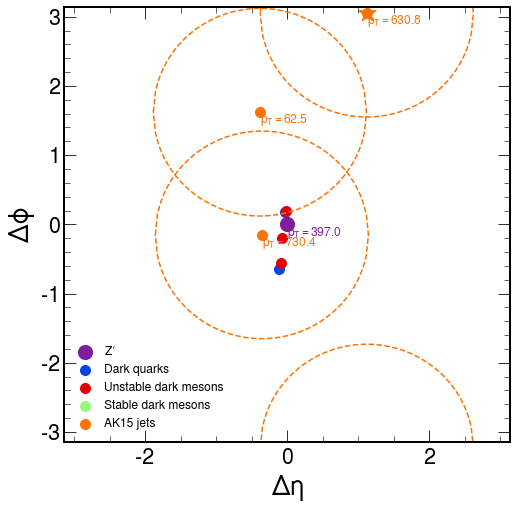

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


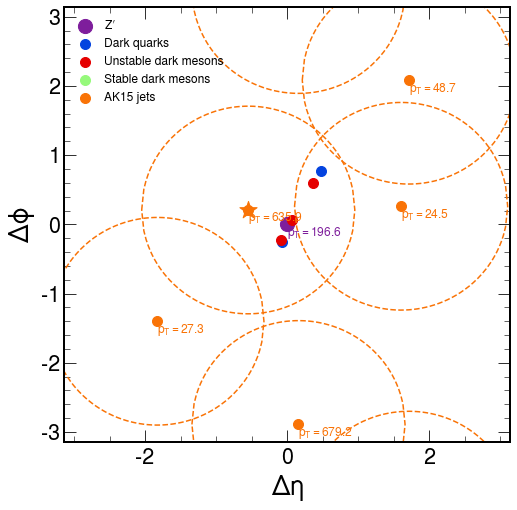

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


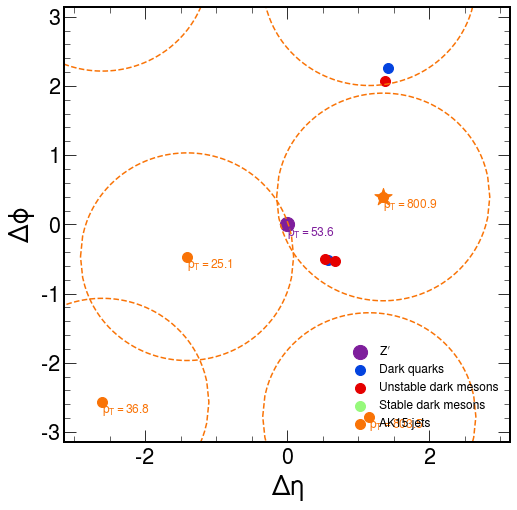

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


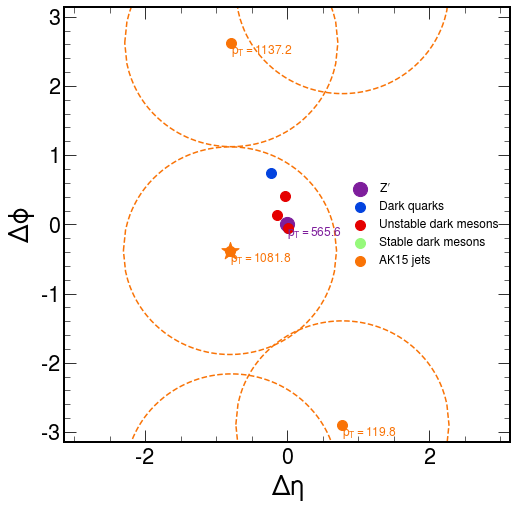

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


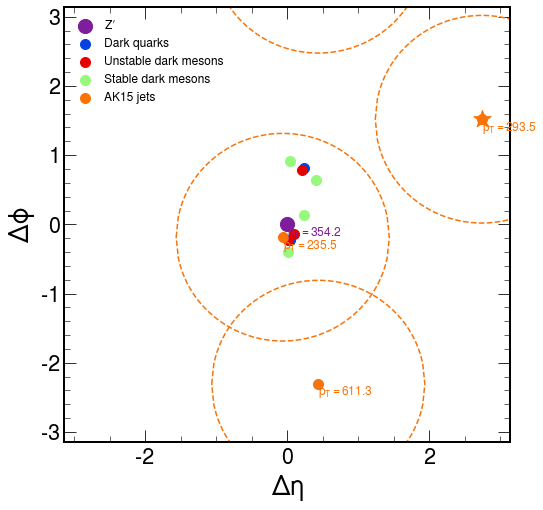

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


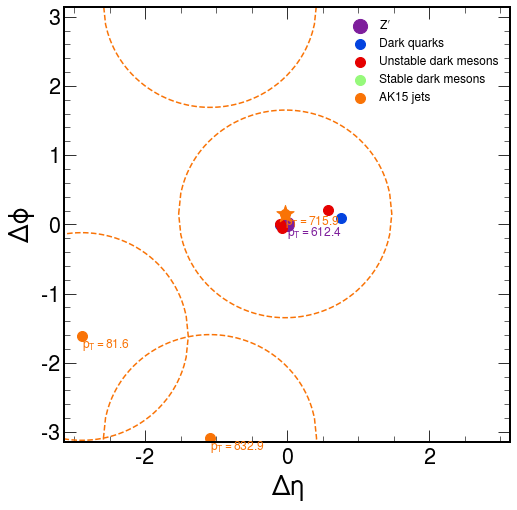

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


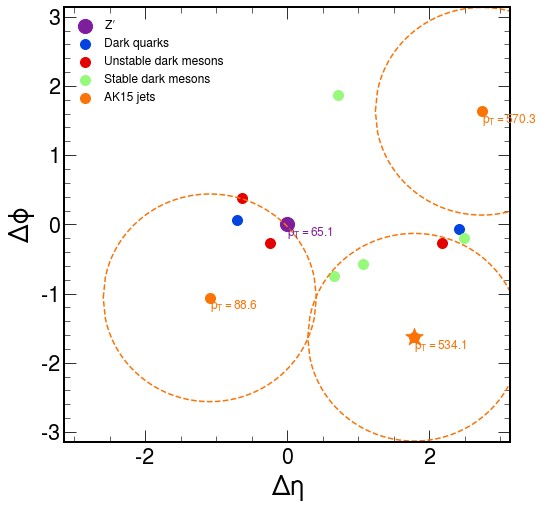

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


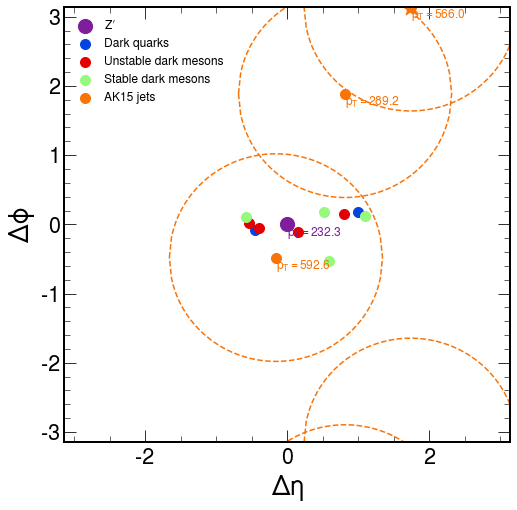

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


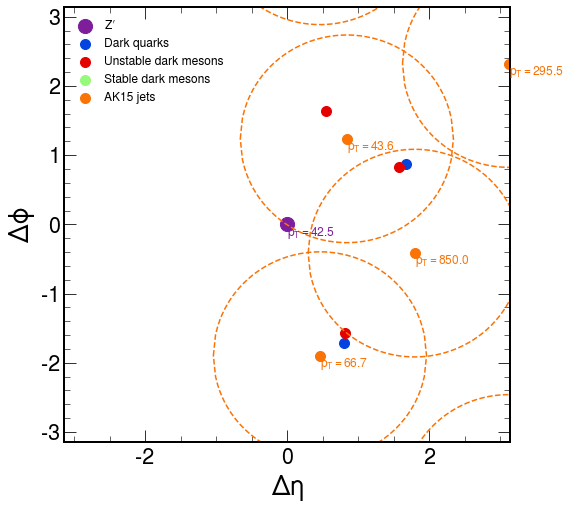

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


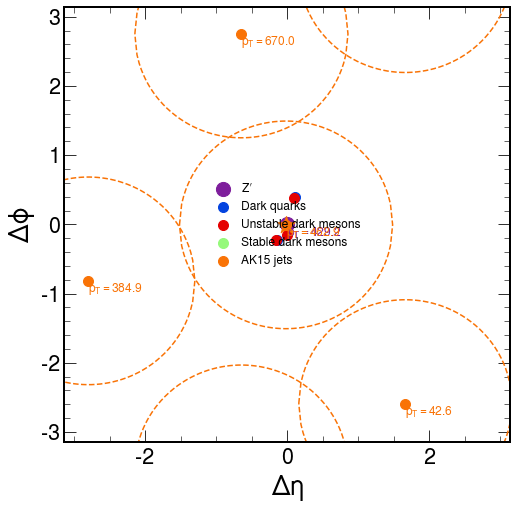

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


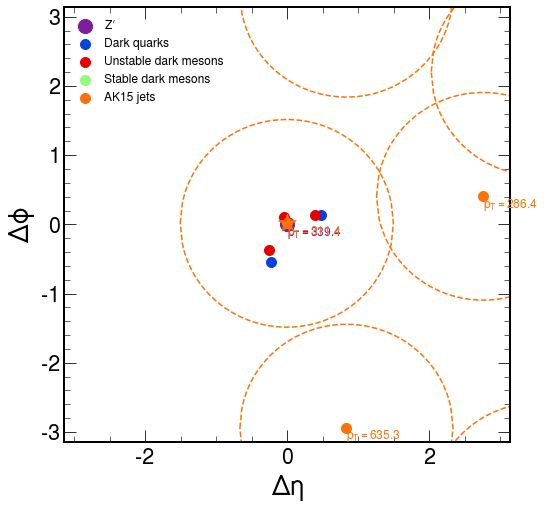

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


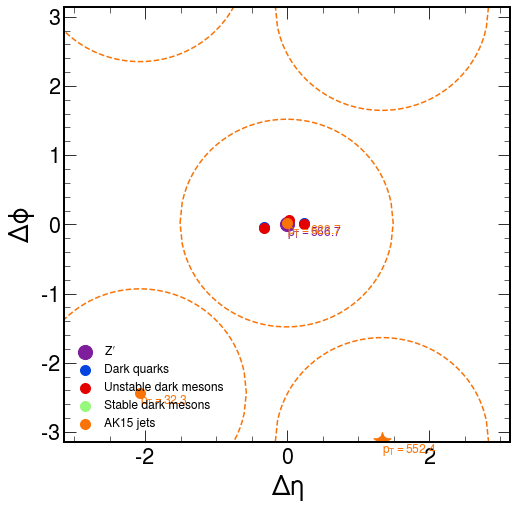

In [99]:
importlib.reload(svjflatanalysis.arrayutils)
importlib.reload(svjflatanalysis.dataset)
from math import pi
import time

def shift(jets, eta, phi):
    """
    Shifts a jets.eta and jets.phi by eta and phi
    """
    jets.eta = jets.eta - eta
    jets.phi = jets.phi - phi
    # Some normalization of phi - first substract whole 2*pi's
    jets.phi[jets.phi > 2.*pi] -= 2.*pi
    jets.phi[jets.phi < -2.*pi] += 2.*pi
    # Then flip to -pi < phi < pi regime
    jets.phi[jets.phi > pi] -= 2.*pi
    jets.phi[jets.phi < -pi] += 2.*pi

def get_dr_ring(dr, n_points=100):        
    deta = np.linspace(-dr, dr, n_points)
    dphi = np.sqrt(dr**2 - np.square(deta))
    deta = np.concatenate((deta, deta[::-1]))
    dphi = np.concatenate((dphi, -dphi[::-1]))
    return deta, dphi
    
def plot(event, ax=None, i=0, save=False):
    if ax is None: ax = svjflatanalysis.utils.get_ax()
        
    select_zprime = (event[b'GenParticles_PdgId'] == 4900023)
    zprime = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'zprime',
        event[b'GenParticles.fCoordinates.fPt'][select_zprime].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_zprime].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_zprime].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_zprime].flatten()
        )

    select_dark_quarks = (np.abs(event[b'GenParticles_PdgId']) == 4900101) & (np.abs(event[b'GenParticles_Status']) == 71)
    dark_quarks = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'dark_quarks',
        event[b'GenParticles.fCoordinates.fPt'][select_dark_quarks].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_dark_quarks].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_dark_quarks].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_dark_quarks].flatten()
        )
    shift(dark_quarks, zprime.eta, zprime.phi)
    
    select_unstable_dark_mesons = np.abs(event[b'GenParticles_PdgId'])>=4900111
    unstable_dark_mesons = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'unstable_dark_mesons',
        event[b'GenParticles.fCoordinates.fPt'][select_unstable_dark_mesons].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_unstable_dark_mesons].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_unstable_dark_mesons].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_unstable_dark_mesons].flatten()
        )
    shift(unstable_dark_mesons, zprime.eta, zprime.phi)

    select_stable_dark_mesons = (np.abs(event[b'GenParticles_PdgId'])>=51) & (np.abs(event[b'GenParticles_PdgId'])<=53)
    stable_dark_mesons = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'stable_dark_mesons',
        event[b'GenParticles.fCoordinates.fPt'][select_stable_dark_mesons].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_stable_dark_mesons].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_stable_dark_mesons].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_stable_dark_mesons].flatten()
        )
    shift(stable_dark_mesons, zprime.eta, zprime.phi)

    ak15_jets = svjflatanalysis.arrayutils.Jets(b'JetsAK15', event, has_subjets=False)
    shift(ak15_jets, zprime.eta, zprime.phi)

    subleading_ak15_jet = svjflatanalysis.arrayutils.Jets(b'JetsAK15_subleading', event, has_subjets=True, has_preprocessed_subjets=True)
    shift(subleading_ak15_jet, zprime.eta, zprime.phi)
    
    ax.scatter([0.], [0.], color='xkcd:purple', s=200, label=r'$Z\prime$')
    ax.text(
        0., 0.,
        r'$p_{{T}}={:.1f}$'.format(zprime.pt[0]),
        fontsize=12,
        verticalalignment='top',
        horizontalalignment='left',
        color='xkcd:purple'
        )

#     for dr in [ 0.1, 0.8, 1.5 ]:
#         etas, phis = get_dr_ring(dr)
#         label_index = int(len(etas)*0.27)
#         ax.plot(etas, phis, color='k', linestyle='--')
#         ax.text(
#             etas[label_index], phis[label_index],
#             r'$\Delta R={0:.1f}$'.format(dr),
#             fontsize=15
#             )

    ax.scatter(dark_quarks.eta, dark_quarks.phi, color='xkcd:blue', s=100, label='Dark quarks')
    ax.scatter(unstable_dark_mesons.eta, unstable_dark_mesons.phi, color='xkcd:red', s=100, label='Unstable dark mesons')
    ax.scatter(stable_dark_mesons.eta, stable_dark_mesons.phi, color='xkcd:light green', s=100, label='Stable dark mesons')
    
    ax.scatter(ak15_jets.eta, ak15_jets.phi, color='xkcd:orange', s=100, label='AK15 jets')
    for ijet in range(len(ak15_jets.eta)):
        eta, phi = get_dr_ring(1.5)
        eta_jet = ak15_jets.eta[ijet]
        phi_jet = ak15_jets.phi[ijet]
        eta += eta_jet
        phi += phi_jet
        ax.plot(eta, phi, color='xkcd:orange', linestyle='--')
        # Make plot roll over to other side for phi over/undershoots
        ax.plot(eta, phi-2*pi, color='xkcd:orange', linestyle='--')
        ax.plot(eta, phi+2*pi, color='xkcd:orange', linestyle='--')
        if np.abs(eta_jet) < pi and np.abs(phi_jet) < pi:
            ax.text(
                eta_jet, phi_jet,
                r'$p_{{T}}={:.1f}$'.format(ak15_jets.pt[ijet]),
                fontsize=12,
                verticalalignment='top',
                horizontalalignment='left',
                color='xkcd:orange'
                )


    ax.scatter(subleading_ak15_jet.eta, subleading_ak15_jet.phi, color='xkcd:orange', s=330, marker='*' )
    
    ax.set_xlim(-pi, pi)
    ax.set_ylim(-pi, pi)
    ax.set_xlabel(r'$\Delta\eta$')
    ax.set_ylabel(r'$\Delta\phi$')
    ax.legend(fontsize=12)
    
    if save:
        outdir = 'eventdisplays_{}'.format(time.strftime('%b%d'))
        if not osp.isdir(outdir): os.makedirs(outdir)
        plt.savefig(osp.join(outdir, 'event{}.png'.format(i)))
    
    
for i_event, event in enumerate(svjflatanalysis.dataset.iterate_events(arrays, flat=True)):
    plot(event, i=i_event, save=True)